In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
img = cv2.imread('image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

new_width = 2858
ratio = new_width / img.shape[1]
new_height = int(img.shape[0] * ratio)
resized_image = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_AREA)
print(f"Ширина измененного изображения: {resized_image.shape[1]}")
print(f"Высота измененного изображения: {resized_image.shape[0]}")


Ширина измененного изображения: 2858
Высота измененного изображения: 2335


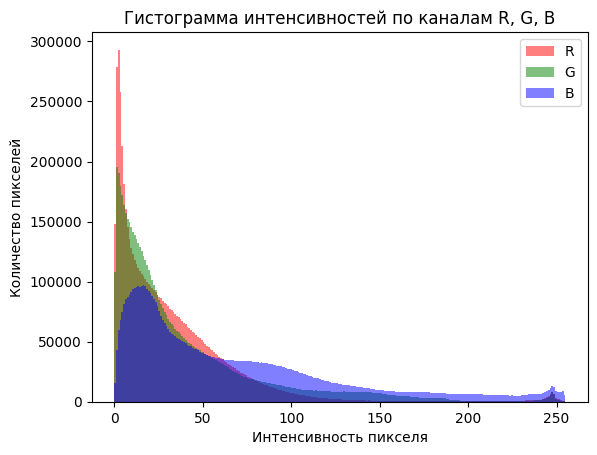

In [18]:
b, g, r = cv2.split(resized_image)

# Постройте гистограмму для каждого канала
plt.hist(r.flatten(), bins=256, color='red', alpha=0.5, label='R')
plt.hist(g.flatten(), bins=256, color='green', alpha=0.5, label='G')
plt.hist(b.flatten(), bins=256, color='blue', alpha=0.5, label='B')

# Добавьте легенду
plt.legend(loc='upper right')

# Отобразите гистограмму
plt.title('Гистограмма интенсивностей по каналам R, G, B')
plt.xlabel('Интенсивность пикселя')
plt.ylabel('Количество пикселей')
plt.show()

In [21]:
histogram = cv2.calcHist([resized_image], [0], None, [256], [0, 256])
histogram_r = cv2.calcHist([resized_image], [0], None, [256], [0, 256])
histogram_g = cv2.calcHist([resized_image], [1], None, [256], [0, 256])
histogram_b = cv2.calcHist([resized_image], [2], None, [256], [0, 256])

# Найдите наибольшее значение плотности
max_density = max(np.max(histogram_r), np.max(histogram_g), np.max(histogram_b))

# Выведите наибольшее значение плотности
print("Наибольшее значение плотности:", max_density)

Наибольшее значение плотности: 293077.0


In [23]:

r_channel, g_channel, b_channel = cv2.split(resized_image)

# Линейная нормировка по каждому каналу
b_channel_normalized = cv2.normalize(b_channel, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
g_channel_normalized = cv2.normalize(g_channel, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
r_channel_normalized = cv2.normalize(r_channel, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Соединение каналов обратно в изображение
normalized_image = cv2.merge([r_channel_normalized, g_channel_normalized, b_channel_normalized])
r, g, b = normalized_image[1196, 1464]
print(f'{r}, {g}, {b}')

222, 222, 222


In [24]:
import pywt
cA, (cH, cV, cD) = pywt.dwt2(img, wavelet='haar')
cA1 = pywt.dwt2(cA, wavelet='haar')[0]
threshold = 60
cA1[np.abs(cA1) < threshold] = 0
# print(np.count_nonzero(cA1))
print(np.size(cA1) - np.count_nonzero(cA1))

1242496
